In [2]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [3]:
ROOT = 'C:\\Users\\curea\\Documents\\bioFM for drug discovery\\dege-fm\\src\\evaluation_module\\e_dist\\'

edist_emb = pd.read_csv(ROOT + "results\\e_distance_embeddings.csv")
edist_hvg = pd.read_csv(ROOT + "results\\e_distance_hvg.csv")

In [4]:
edist_hvg

,compound,dose,cell_type,e_dist,sample_size
0,Enzastaurin (LY317615),1000.0,A549,0.028964,195
1,Enzastaurin (LY317615),10.0,A549,0.010357,133
2,Enzastaurin (LY317615),100.0,A549,0.021611,166
3,Enzastaurin (LY317615),10000.0,A549,0.397209,193
4,Enzastaurin (LY317615),1000.0,MCF7,0.010969,438
...,...,...,...,...,...
2251,PHA-680632,10000.0,MCF7,0.224793,176
2252,PHA-680632,1000.0,K562,0.149377,146
2253,PHA-680632,10.0,K562,0.007983,209
2254,PHA-680632,100.0,K562,0.013028,191


In [5]:
edist_emb

,compound,dose,cell_type,e_dist,sample_size
0,Enzastaurin (LY317615),1000.0,A549,0.005937,195
1,Enzastaurin (LY317615),10.0,A549,0.003234,133
2,Enzastaurin (LY317615),100.0,A549,0.006405,166
3,Enzastaurin (LY317615),10000.0,A549,0.233896,193
4,Enzastaurin (LY317615),1000.0,MCF7,0.008482,438
...,...,...,...,...,...
2215,PHA-680632,10000.0,MCF7,0.196858,176
2216,PHA-680632,1000.0,K562,0.128202,146
2217,PHA-680632,10.0,K562,0.000727,209
2218,PHA-680632,100.0,K562,0.013481,191


preprocess df to create an unique index, common for both dataframes

In [6]:
def preprocess_df(df):
    index = list()
    for i, row in df.iterrows():
        ind = row['compound'] + str(row['dose']) + row['cell_type']
        index.append(ind)

    df.index = index


In [7]:
preprocess_df(edist_hvg)
preprocess_df(edist_emb)

plot the distribution of sample sizes

In [8]:
def plot_sample_size(df, title):
    sample_size_list = list(df['sample_size'])

    plt.figure(figsize=(8, 6))
    sns.histplot(sample_size_list, bins=15, kde=False, color='cyan')
    plt.xlabel("Sample Size")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.title(title)
    plt.show()

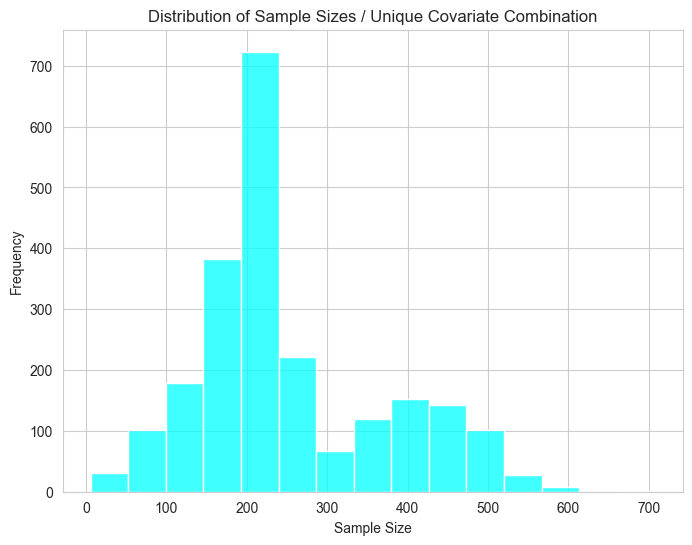

In [9]:
plot_sample_size(edist_hvg, "Distribution of Sample Sizes / Unique Covariate Combination")

Distribution of E distances

In [16]:
def plot_edist_distribution(df, title, cutoff=1.0):
    e_dist_list = list(df['e_dist'])

    if cutoff is not None:
        e_dist_list = [x for x in e_dist_list if x < cutoff]

    plt.figure(figsize=(8, 6))
    sns.histplot(e_dist_list, bins=30, kde=False, color='red')
    plt.xlabel("E-Distance")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.grid(True)
    plt.show()

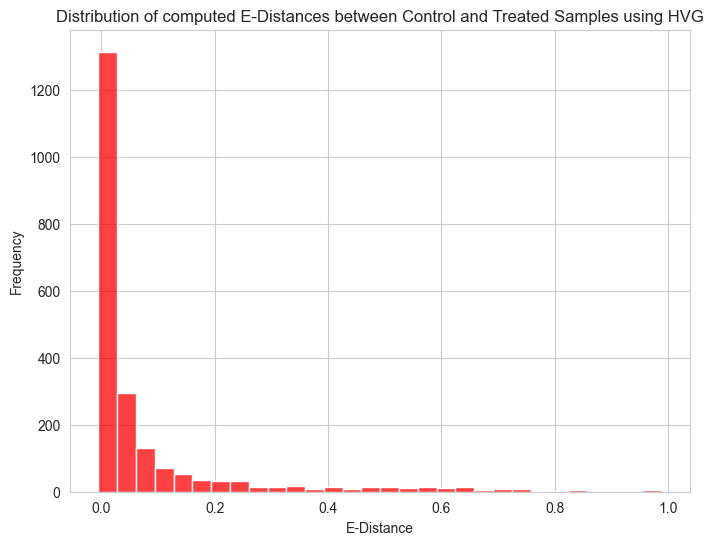

In [17]:
plot_edist_distribution(edist_hvg, "Distribution of computed E-Distances between Control and Treated Samples using HVG")

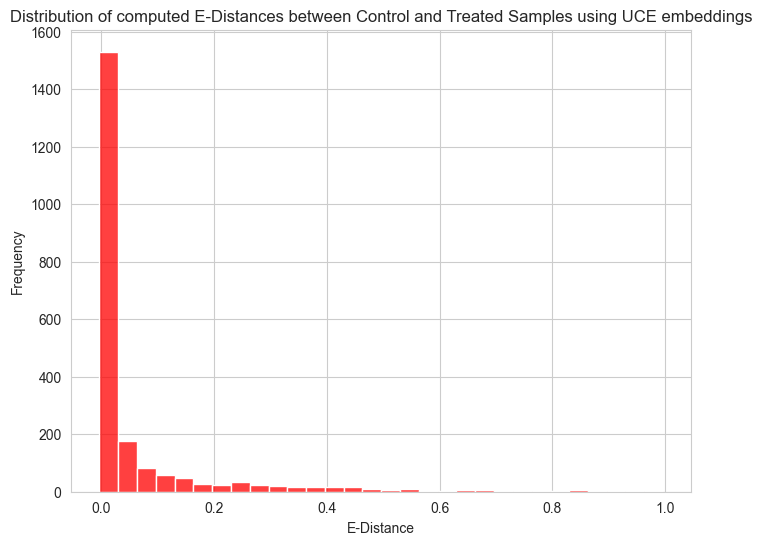

In [18]:
plot_edist_distribution(edist_emb, "Distribution of computed E-Distances between Control and Treated Samples using UCE embeddings")

Correlation between sample size and e-distance

In [53]:
def plot_corr_samplesize_edist(df, title, e_dist_cutoff=None):
    e_dist_list = list(df['e_dist'])
    sample_size_list = list(df['sample_size'])

    if e_dist_cutoff is not None:
        index_to_remove = list()
        for i in range(len(e_dist_list)):
            if e_dist_list[i] > e_dist_cutoff:
                index_to_remove.append(i)

        e_dist_list = [elem for index, elem in enumerate(e_dist_list) if index not in index_to_remove]
        sample_size_list = [elem for index, elem in enumerate(sample_size_list) if index not in index_to_remove]

    correlation, p_value = spearmanr(e_dist_list, sample_size_list)

    plt.figure(figsize=(8, 6))
    sns.regplot(x=e_dist_list, y=sample_size_list, ci=None, line_kws={"color": "red", "linestyle": "dotted"})
    plt.xlabel('E-Distance')
    plt.ylabel('Sample Size')
    plt.title(title)
    plt.grid(True)

    plt.text(0.05, 0.95, f'Spearman Correlation: {correlation:.2f}, p-val: {p_value}',
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

    plt.show()



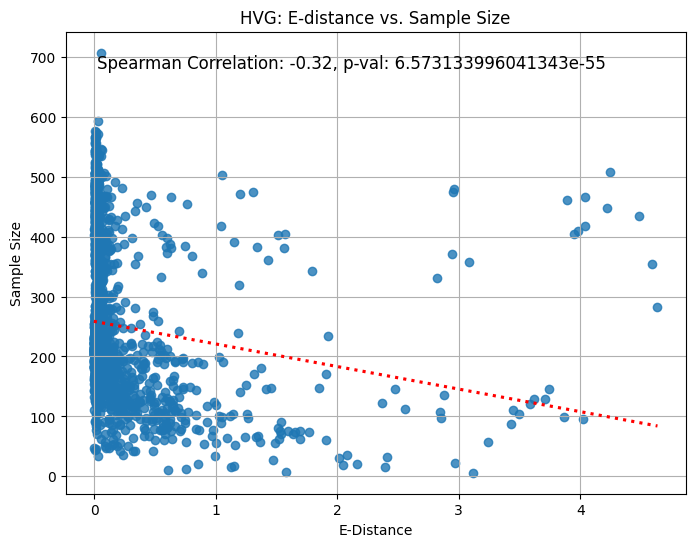

In [57]:
plot_corr_samplesize_edist(edist_hvg, "HVG: E-distance vs. Sample Size")

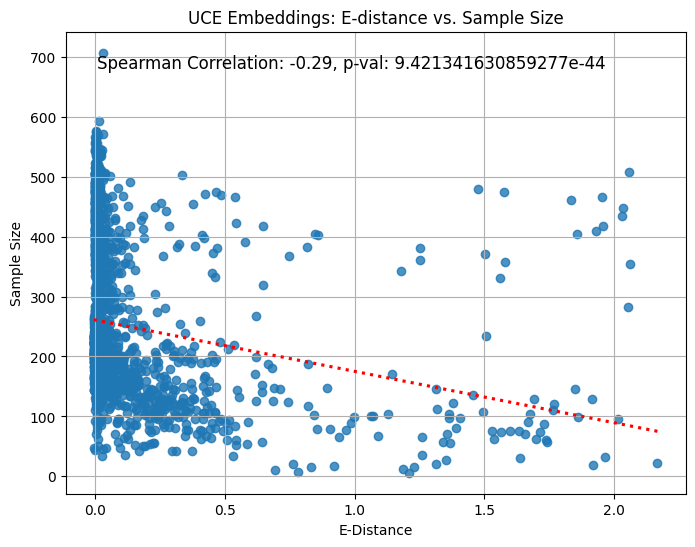

In [56]:
plot_corr_samplesize_edist(edist_emb, "UCE Embeddings: E-distance vs. Sample Size")

In [76]:
def plot_corr_dose_edist(df, title, e_dist_cutoff=None):
    e_dist_list = list(df['e_dist'])
    dose_list = list(df['dose'])


    if e_dist_cutoff is not None:
        index_to_remove = list()
        for i in range(len(e_dist_list)):
            if e_dist_list[i] > e_dist_cutoff:
                index_to_remove.append(i)

        e_dist_list = [elem for index, elem in enumerate(e_dist_list) if index not in index_to_remove]
        dose_list = [elem for index, elem in enumerate(dose_list) if index not in index_to_remove]

    correlation, p_value = spearmanr(e_dist_list, dose_list)

    data = pd.DataFrame({"Dose": [str(x) for x in dose_list], "E-Distance": e_dist_list})
    data = data.sort_values(by="Dose", ascending=True)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dose', y='E-Distance', data=data, palette='Set3')
    plt.title(title)
    plt.xlabel('Dose')
    plt.ylabel('E-Distance')
    plt.text(0.05, 0.95, f'Spearman Correlation: {correlation:.2f}, p-val: {p_value}',
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')
    plt.show()




C:\Users\curea\AppData\Local\Temp\ipykernel_15168\3289297362.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dose', y='E-Distance', data=data, palette='Set3')


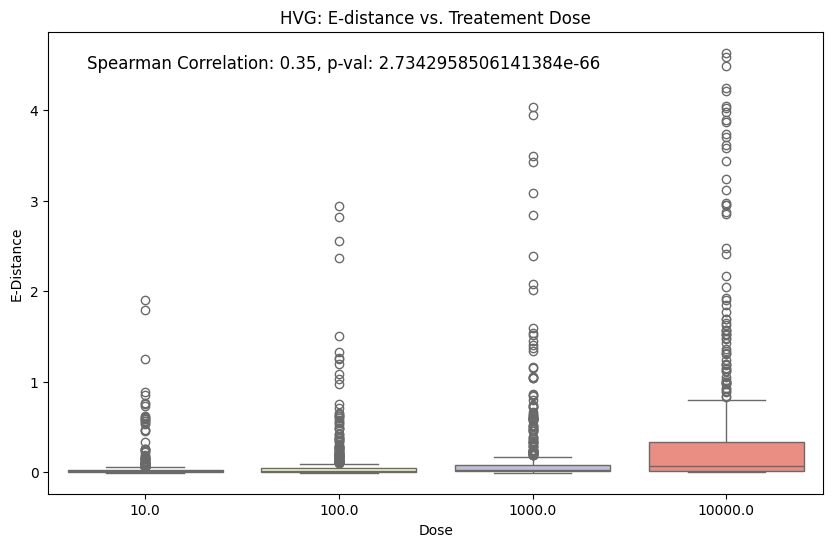

In [77]:
plot_corr_dose_edist(edist_hvg, "HVG: E-distance vs. Treatement Dose")

C:\Users\curea\AppData\Local\Temp\ipykernel_15168\3289297362.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dose', y='E-Distance', data=data, palette='Set3')


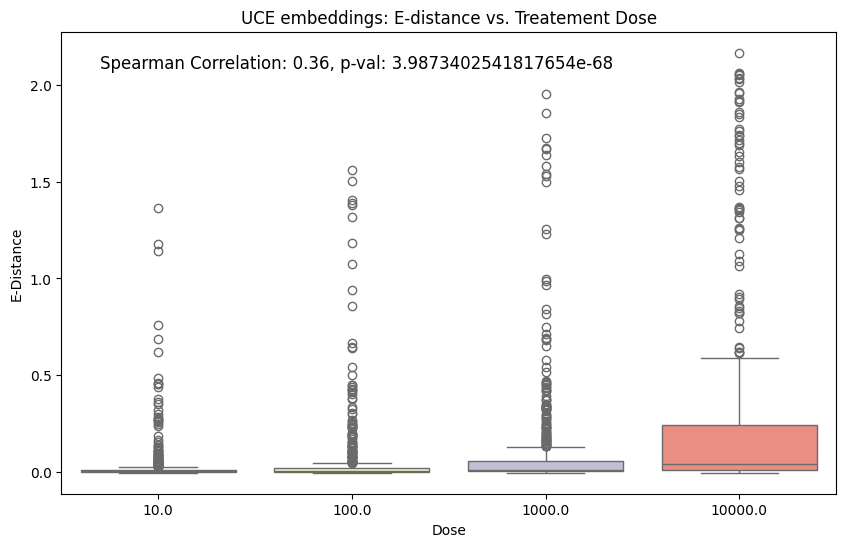

In [78]:
plot_corr_dose_edist(edist_emb, "UCE embeddings: E-distance vs. Treatement Dose")

Correlation between e-distances in HVG space vs. UCE embedding space

In [90]:
def plot_edist_corr(df_hvg, df_emb, title, e_dist_cutoff=None):
    e_dist_hvg_list = list()
    e_dist_emb_list = list()
    conditions = list()
    for condition in list(set(list(df_hvg.index) + list(df_emb.index))):
        if (condition in list(df_hvg.index)) and (condition in list(df_emb.index)):
            e_dist_hvg = df_hvg.loc[condition, "e_dist"]
            e_dist_emb = df_emb.loc[condition, "e_dist"]

            e_dist_hvg_list.append(e_dist_hvg)
            e_dist_emb_list.append(e_dist_emb)
            conditions.append(condition)

    data = pd.DataFrame({"e_dist_hvg": e_dist_hvg_list, "e_dist_emb": e_dist_emb_list})
    data.index = conditions

    correlation, p_value = spearmanr(data["e_dist_hvg"], data["e_dist_emb"])

    plt.figure(figsize=(8, 6))
    sns.regplot(x=data["e_dist_hvg"], y=data["e_dist_emb"], ci=None, line_kws={"color": "red", "linestyle": "dotted"})
    plt.xlabel('E-Distance: HVG')
    plt.ylabel('E-Distance: UCE Embeddings')
    plt.title(title)
    plt.grid(True)

    plt.text(0.05, 0.95, f'Spearman Correlation: {correlation:.2f}, p-val: {p_value}',
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

    plt.show()

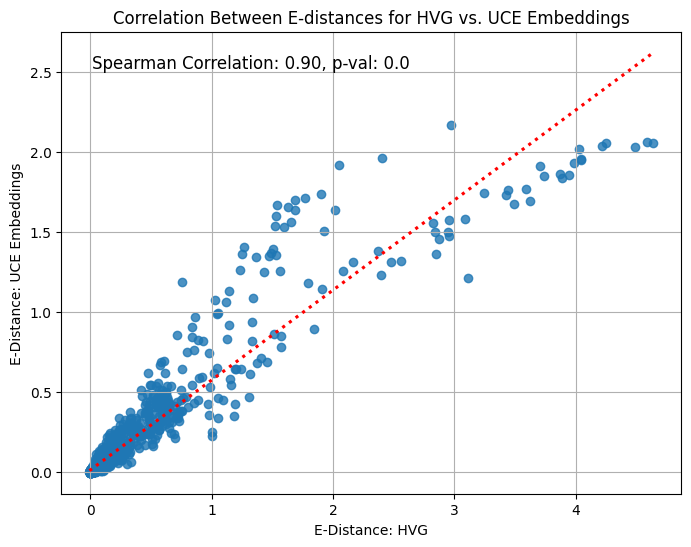

In [91]:
plot_edist_corr(edist_hvg,edist_emb, "Correlation Between E-distances for HVG vs. UCE Embeddings")